In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [35]:
df_data = pd.read_csv('CFPB-financial-wellness-data.csv')
df_data.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


In [380]:
print(df_data[df_data['PRODUSE_3'] == 1])
print(df_data[df_data['PRODUSE_3'] == 0])

      PUF_ID  sample  fpl  LMscore  FK1correct  FK2correct  FK3correct  \
2      13699       1    3        3           1           1           1   
7       7741       1    3        3           1           1           1   
15     11726       1    1        3           1           1           1   
19     12990       2    2        1           0           1           0   
23     13255       1    3        3           1           1           1   
...      ...     ...  ...      ...         ...         ...         ...   
6378   13471       3    3        1           1           0           0   
6379   11619       3    3        2           1           0           1   
6383   13231       3    1        2           1           0           1   
6384   13085       3    2        1           1           0           0   
6393    8516       3    2        2           1           0           1   

      KHscore  KH1correct  KH2correct  ...  PPMSACAT  PPREG4  PPREG9  PPT01  \
2      -0.188           1       

In [363]:
df_data = df_data.replace(-1, np.nan).dropna(axis=1)
df_data

,PUF_ID,sample,fpl,LMscore,FK1correct,FK2correct,FK3correct,KHscore,KH1correct,KH2correct,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,3,1,1,1,1.267,1,1,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,3,1,1,1,-0.570,0,1,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,3,1,1,1,-0.188,1,1,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,2,1,0,1,-1.485,0,0,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,1,0,0,1,-1.900,0,0,...,1,2,4,0,0,1,0,4,1,4.260668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,11220,3,3,3,1,1,1,1.267,1,1,...,1,2,3,0,0,0,1,2,-5,0.522504
6390,13118,3,2,1,1,0,0,-1.215,0,0,...,1,3,6,0,0,0,0,3,-5,1.015219
6391,8709,1,3,2,1,0,1,-1.215,0,1,...,1,1,2,0,0,0,0,2,0,1.136270
6392,8515,1,3,2,1,0,1,-1.215,0,1,...,1,4,9,0,0,0,0,2,0,1.224941


In [341]:
race

,PRODUSE_3,PPETHM
0,0,1
1,0,1
2,1,2
3,0,1
4,0,3
...,...,...
6389,0,2
6390,0,2
6391,0,1
6392,0,4


In [352]:
race = df_data[['PRODUSE_3', 'PPETHM']]
#print(race.value_counts())
white = 268 / (4230 + 268) * 100
black = 127 / (127 + 558) * 100
other = 29 / (307 + 29) * 100
hispanic = 136 / (136 + 739) * 100

average = (white + black + other + hispanic) / 4

print(black)
print(average)


18.54014598540146
12.168039788818973


1.4621451104100947

###

In [373]:
# separating the target from all the features

df_data.dropna(inplace = True)
print(df_data)
X = df_data.drop(['PRODUSE_3','PRODUSE_6'], axis = 1)
y = df_data['PRODUSE_3']

      PUF_ID  sample  fpl  LMscore  FK1correct  FK2correct  FK3correct  \
0      10350       2    3        3           1           1           1   
1       7740       1    3        3           1           1           1   
2      13699       1    3        3           1           1           1   
3       7267       1    3        2           1           0           1   
4       7375       1    3        1           0           0           1   
...      ...     ...  ...      ...         ...         ...         ...   
6389   11220       3    3        3           1           1           1   
6390   13118       3    2        1           1           0           0   
6391    8709       1    3        2           1           0           1   
6392    8515       1    3        2           1           0           1   
6393    8516       3    2        2           1           0           1   

      KHscore  KH1correct  KH2correct  ...  PPMSACAT  PPREG4  PPREG9  PPT01  \
0       1.267           1       

# Test 1: Random Forest

In [369]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 20, step = 1)
rfe_selector.fit(X, y) 

RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

In [370]:
features = df_data[X.columns[rfe_selector.get_support()]]
print(features.columns)
target = df_data['PRODUSE_3']

KeyError: "['SWB_2', 'FWBscore', 'FSscore', 'SUBNUMERACY2', 'SUBNUMERACY1', 'CHANGEABLE', 'HOUSERANGES', 'SAVINGSRANGES', 'CONNECT', 'OUTLOOK_1', 'PEM', 'SOCSEC3', 'LIFEEXPECT'] not in index"

In [299]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

In [300]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [311]:
# Best Params - RandomForestClassifier 
RF = RandomForestClassifier()
search_grid = {'n_estimators': [100, 150, 200]}
search = GridSearchCV(estimator = RF, param_grid = search_grid, scoring = 'f1')


search.fit(X_train_scaled, y_train)
print(search.best_params_) 
print(search.best_score_)

{'n_estimators': 100}
0.0926433985852689


In [332]:
model = RandomForestClassifier(random_state=0, n_estimators=100)
results = model.fit(X_train_scaled,y_train)

y_pred_proba = results.predict_proba(X_test_scaled)[:,1]
y_pred = [ 0 if x < 0.15 else 1 for x in y_pred_proba]

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1168
           1       0.20      0.47      0.28       111

    accuracy                           0.79      1279
   macro avg       0.57      0.64      0.58      1279
weighted avg       0.88      0.79      0.82      1279



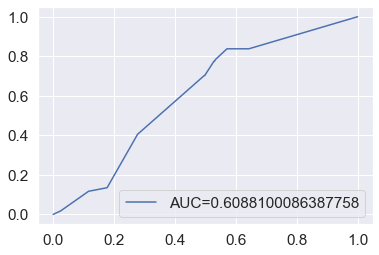

In [333]:
y_pred_proba = results.predict_proba(X_test)[:,1]
fpr, tpr, t = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.show()

[[957 211]
 [ 59  52]]


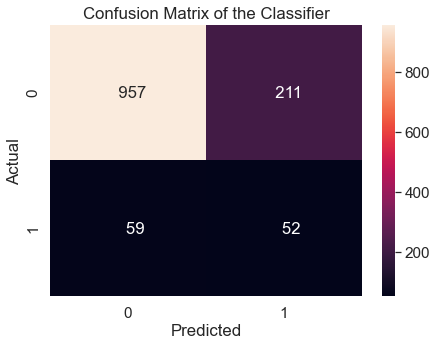

In [334]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'], index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize=(7,5))
sns.heatmap(cf_df, annot=True, fmt='5.0f')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# Test 2: Logistic Regression


## RFE

In [367]:
# Selecting the Best important features according to Logistic Regression

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 20, step = 1)
rfe_selector.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [359]:
features = df_data[X.columns[rfe_selector.get_support()]]
features.columns

Index(['FINGOALS', 'KH1correct', 'KH3correct', 'HOUSING', 'IMPUTATION_FLAG',
       'PRODHAVE_1', 'PRODHAVE_4', 'CONSPROTECT3', 'REJECTED_1', 'BENEFITS_4',
       'SHOCKS_8', 'SHOCKS_12', 'FINSOC2_5', 'ON2correct', 'ON1correct',
       'INTERCONNECTIONS_4', 'INTERCONNECTIONS_6', 'INTERCONNECTIONS_10',
       'EMPLOY1_5', 'EMPLOY1_6'],
      dtype='object')

In [ ]:
# Dummify Variables

X_cat = X_f.drop(columns = ["FWBscore", "FSscore", "LMscore", "KHscore", "CONNECT", "LIFEEXPECT"], errors = "ignore").astype('str')
X_numeric = X_f.loc[:, ~X_f.columns.isin(X_cat.columns)]
print(X_numeric)
X = pd.concat([pd.get_dummies(X_cat), X_numeric], axis = 1)

In [182]:
target = df_data['PRODUSE_3']
target

0       0
1       0
2       1
3       0
4       0
       ..
6389    0
6390    0
6391    0
6392    0
6393    1
Name: PRODUSE_3, Length: 6394, dtype: int64

In [183]:
X.columns[rfe_selector.get_support()]

Index(['FINGOALS', 'KH1correct', 'KH3correct', 'HOUSING', 'IMPUTATION_FLAG',
       'PRODHAVE_1', 'PRODHAVE_4', 'CONSPROTECT3', 'REJECTED_1', 'BENEFITS_4',
       'SHOCKS_8', 'SHOCKS_12', 'FINSOC2_5', 'ON2correct', 'ON1correct',
       'INTERCONNECTIONS_4', 'INTERCONNECTIONS_6', 'INTERCONNECTIONS_10',
       'EMPLOY1_5', 'EMPLOY1_6'],
      dtype='object')

<AxesSubplot:>

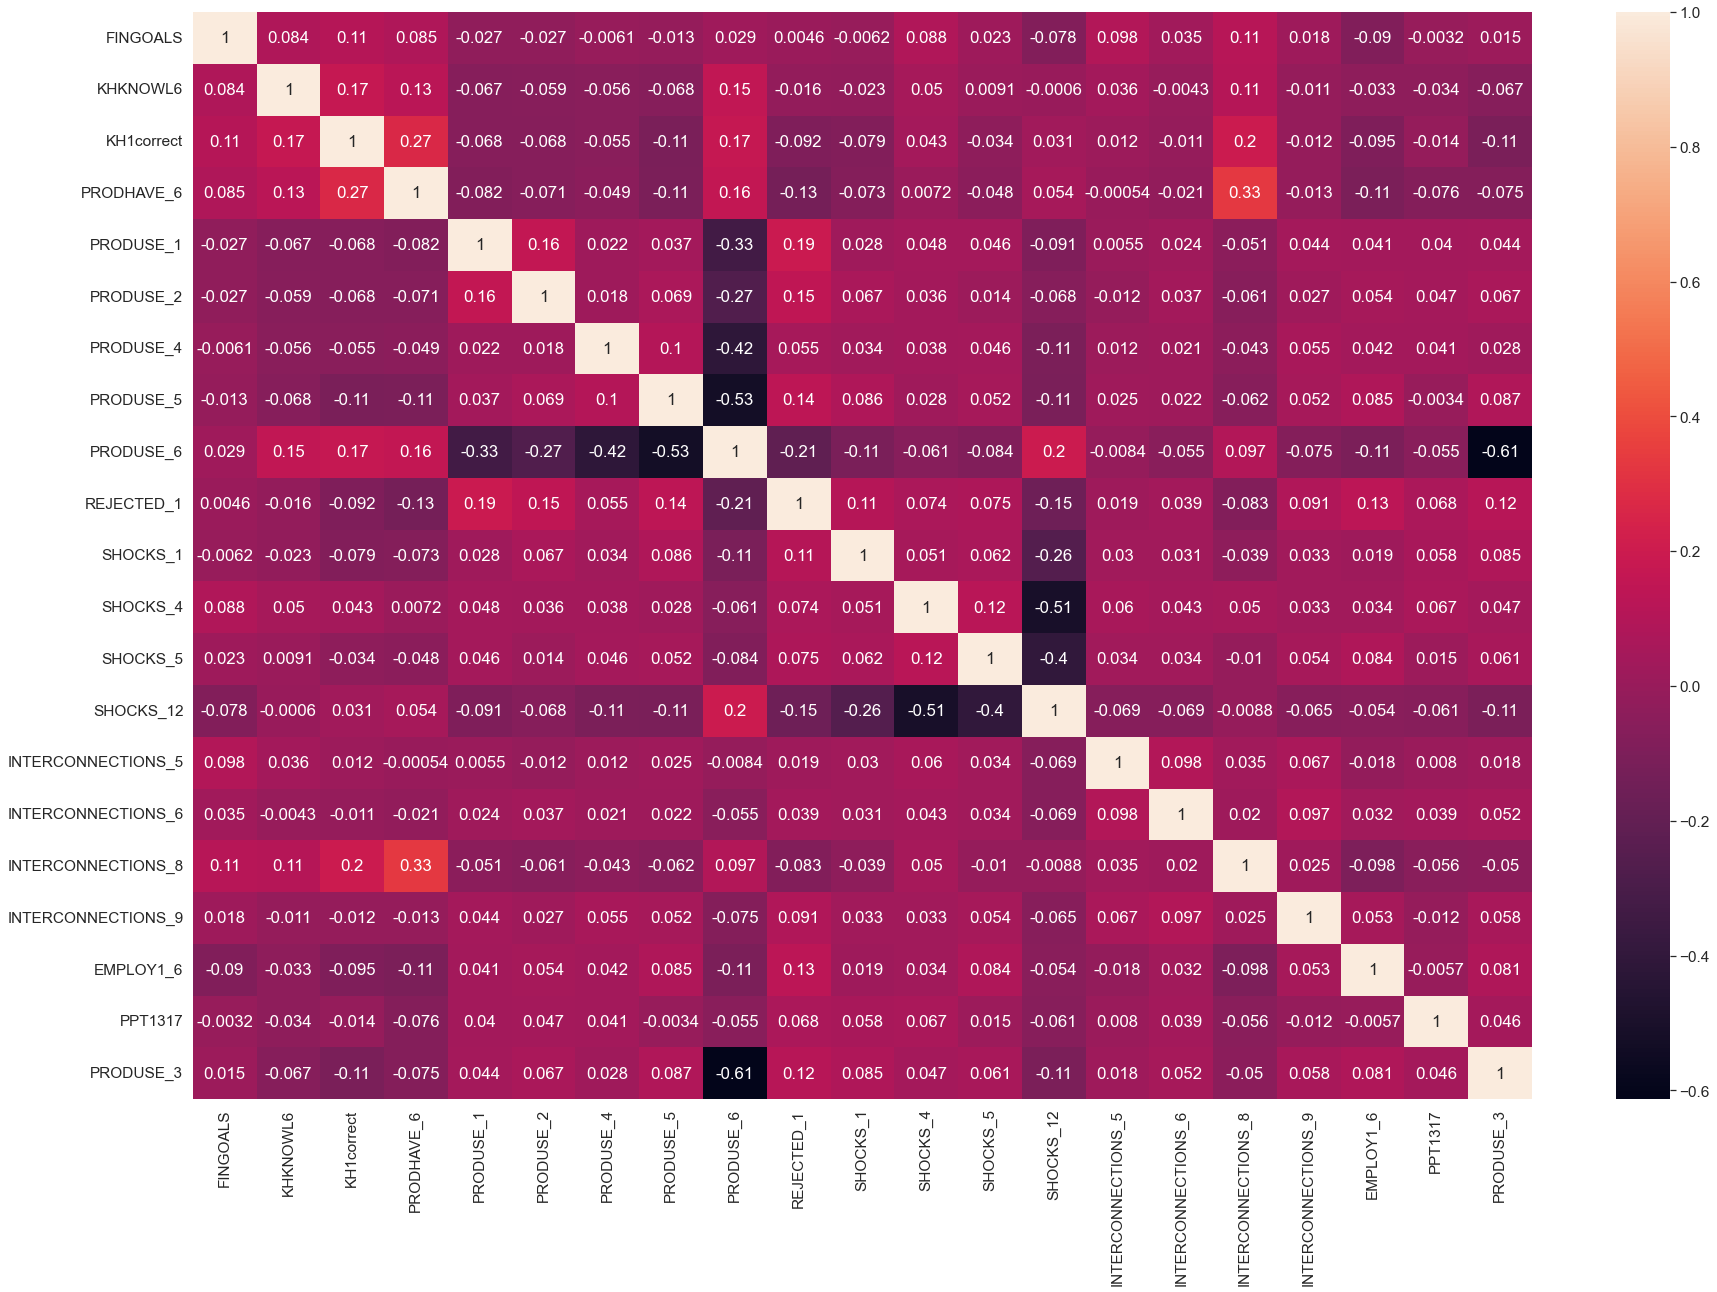

In [184]:
# Heat Map of the data
df_corr = df_data[['FINGOALS', 'KHKNOWL6', 'KH1correct', 'PRODHAVE_6', 'PRODUSE_1',
       'PRODUSE_2', 'PRODUSE_4', 'PRODUSE_5', 'PRODUSE_6', 'REJECTED_1',
       'SHOCKS_1', 'SHOCKS_4', 'SHOCKS_5', 'SHOCKS_12', 'INTERCONNECTIONS_5',
       'INTERCONNECTIONS_6', 'INTERCONNECTIONS_8', 'INTERCONNECTIONS_9',
       'EMPLOY1_6', 'PPT1317','PRODUSE_3']]
plt.figure(figsize = (30,20))
sns.heatmap(df_corr.corr(), annot = True)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

In [186]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [209]:
# make regression model 
model = sm.Logit(y_train, X_train_scaled)

# fit model and print results
results = model.fit()
#print(results.summary())

# Predict outcomes
prob_pred = results.predict(X_test_scaled)
#print(prob_pred)

y_pred = [ 0 if x < 0.5725 else 1 for x in prob_pred]
_test = y_test.squeeze()

#Evaluate (Note that these default metrics provide values for y=1)
evaluation_scores = pd.Series({'Model': " Logistic Regression ",
                 'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'F1 Score': metrics.f1_score(y_test, y_pred)})

print("")
print(evaluation_scores)
print("")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(round(accuracy_score(df["Actual"], df["Predicted"])* 100, 2),"%")
print(" ")
print(" ")

Optimization terminated successfully.
         Current function value: 0.679686
         Iterations 4

Model               Logistic Regression 
ROC AUC Score                   0.668329
Precision Score                 0.235808
Recall Score                    0.486486
Accuracy Score                  0.818608
F1 Score                        0.317647
dtype: object

[[993 175]
 [ 57  54]]
                Predicted group 0  Predicted group 1
Actual group 0                993                175
Actual group 1                 57                 54
 
 
              precision    recall  f1-score   support

           0      0.946     0.850     0.895      1168
           1      0.236     0.486     0.318       111

    accuracy                          0.819      1279
   macro avg      0.591     0.668     0.607      1279
weighted avg      0.884     0.819     0.845      1279

 
 
Accuracy score is
81.86 %
 
 


<class 'pandas.core.series.Series'>
<class 'list'>
[[993 175]
 [ 57  54]]


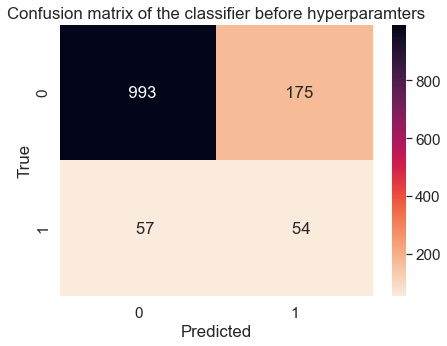

In [211]:
# creating a confusion matrix
print(type(y_test))
print(type(y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

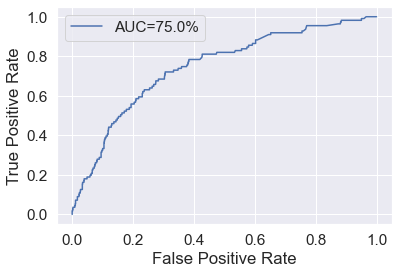

In [210]:
# creating AUC Curve

fpr, tpr, t= metrics.roc_curve(y_test, prob_pred)
auc = metrics.roc_auc_score(y_test,prob_pred)
plt.plot(fpr,tpr,label="AUC="+str(100*round(auc,2))+"%")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### KBest

In [361]:
selector = SelectKBest(f_classif, k = 20)

X_0 = selector.fit_transform(X, y)

X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
#X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

test2_features = X.columns[selector.get_support()]
test2_features
# FWBscore, LMscore, KHscore, CONNECT

Index(['fpl', 'FWBscore', 'FWB2_3', 'MANAGE1_1', 'LMscore', 'KHscore',
       'KH2correct', 'ENDSMEET', 'HOUSING', 'PRODHAVE_1', 'PRODHAVE_3',
       'PRODHAVE_4', 'MATHARDSHIP_1', 'MATHARDSHIP_2', 'MATHARDSHIP_3',
       'REJECTED_1', 'ON2correct', 'CONNECT', 'PPETHM', 'PPINCIMP'],
      dtype='object')

In [226]:
features = df_data[test2_features]
target = df_data['PRODUSE_3']
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [227]:
# make regression model 
model = sm.Logit(y_train, X_train_scaled)

# fit model and print results
results = model.fit()
#print(results.summary())

# Predict outcomes
prob_pred = results.predict(X_test_scaled)
#print(prob_pred)

y_pred = [ 0 if x < 0.55 else 1 for x in prob_pred]
_test = y_test.squeeze()

#Evaluate (Note that these default metrics provide values for y=1)
evaluation_scores = pd.Series({'Model': " Logistic Regression ",
                 'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'F1 Score': metrics.f1_score(y_test, y_pred)})

print("")
print(evaluation_scores)
print("")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(round(accuracy_score(df["Actual"], df["Predicted"])* 100, 2),"%")
print(" ")
print(" ")

Optimization terminated successfully.
         Current function value: 0.680333
         Iterations 4

Model               Logistic Regression 
ROC AUC Score                   0.669671
Precision Score                  0.20339
Recall Score                    0.540541
Accuracy Score                  0.776388
F1 Score                        0.295567
dtype: object

[[933 235]
 [ 51  60]]
                Predicted group 0  Predicted group 1
Actual group 0                933                235
Actual group 1                 51                 60
 
 
              precision    recall  f1-score   support

           0      0.948     0.799     0.867      1168
           1      0.203     0.541     0.296       111

    accuracy                          0.776      1279
   macro avg      0.576     0.670     0.581      1279
weighted avg      0.884     0.776     0.817      1279

 
 
Accuracy score is
77.64 %
 
 


<class 'pandas.core.series.Series'>
<class 'list'>
[[933 235]
 [ 51  60]]


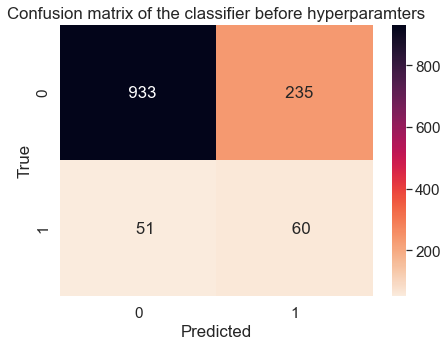

In [228]:
# creating a confusion matrix
print(type(y_test))
print(type(y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

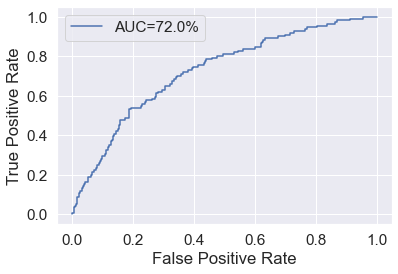

In [229]:
# creating AUC Curve

fpr, tpr, t= metrics.roc_curve(y_test, prob_pred)
auc = metrics.roc_auc_score(y_test,prob_pred)
plt.plot(fpr,tpr,label="AUC="+str(100*round(auc,2))+"%")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Test 3 AdaBoost


In [245]:
rfe_selector = RFE(estimator=AdaBoostClassifier(),n_features_to_select = 20, step = 1)
rfe_selector.fit(X, y)
ada_features = X.columns[selector.get_support()]

In [246]:
features = df_data[test2_features]
target = df_data['PRODUSE_3']
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [247]:

# Best Params - AdaBoostClassifier 
ada= AdaBoostClassifier()
search_grid = {'n_estimators': [100, 150, 200]}
search = GridSearchCV(estimator = ada, param_grid = search_grid, scoring = 'f1')

search.fit(X_train_scaled, y_train)
print(search.best_params_) 
print(search.best_score_)

{'n_estimators': 100}
0.03665573844319363


[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1168
           1       0.16      0.59      0.26       111

    accuracy                           0.71      1279
   macro avg       0.56      0.65      0.54      1279
weighted avg       0.88      0.71      0.77      1279



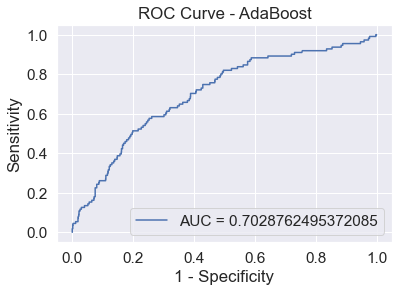

In [273]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
model.fit(X_train_scaled, y_train)

y_test_ppred = search.best_estimator_.predict_proba(X_test)[:,1]
y_test_pred = [(x > .494) for x in y_test_ppred]

print(classification_report(y_test, y_test_pred))

from sklearn.metrics import roc_auc_score, roc_curve

fp, tp, t = roc_curve(y_test, y_test_ppred)
auc = roc_auc_score(y_test, y_test_ppred)
plt.plot(fp, tp, label = "AUC = " + str(auc))
plt.title("ROC Curve - AdaBoost")
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.legend()
plt.show()

[[933 235]
 [ 51  60]]


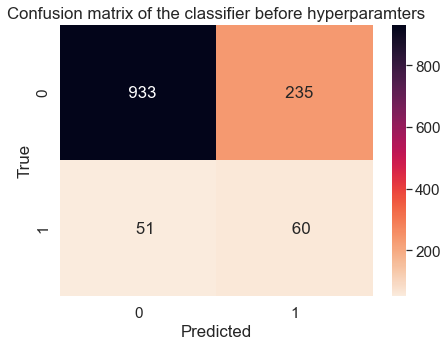

In [274]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [56]:
rfe_selector.get_support()

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

# Testing Metrics w/ Varying Number of Features and Thresholds

## Random Forest

### Number of Features

In [337]:
for i in range(5,21,5):
    
    rfe_test = RFE(estimator=RandomForestClassifier(),n_features_to_select = i, step = 1)
    rfe_test.fit(X, y)
    
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = RandomForestClassifier(random_state=0, n_estimators=100)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)

    # Predict outcomes
    y_pred_proba = results.predict_proba(X_test_scaled)[:,1]

    y_pred = [ 0 if x < .15 else 1 for x in y_pred_proba]

    #Evaluate (Note that these default metrics provide values for y=1)
    print('Number of Features =', i)
    print('--------------------------')
    print(classification_report(y_test, y_pred))

Number of Features = 5
--------------------------
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1168
           1       0.12      0.33      0.18       111

    accuracy                           0.73      1279
   macro avg       0.52      0.55      0.51      1279
weighted avg       0.85      0.73      0.78      1279

Number of Features = 10
--------------------------
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1168
           1       0.16      0.49      0.25       111

    accuracy                           0.74      1279
   macro avg       0.55      0.63      0.54      1279
weighted avg       0.87      0.74      0.79      1279

Number of Features = 15
--------------------------
              precision    recall  f1-score   support

           0       0.94      0.77      0.84      1168
           1       0.16      0.47      0.24       111

    accuracy                  

### Threshold

In [316]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 20, step = 1)
rfe_selector.fit(X, y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

In [331]:
for i in [.135, .14, .145, .15, .155]:

    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = RandomForestClassifier(random_state=0, n_estimators=100)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)

    # Predict outcomes
    y_pred_proba = results.predict_proba(X_test_scaled)[:,1]

    y_pred = [ 0 if x < i else 1 for x in y_pred_proba]

    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

threshold = 0.135
------------------
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1168
           1       0.19      0.50      0.28       111

    accuracy                           0.77      1279
   macro avg       0.57      0.65      0.57      1279
weighted avg       0.88      0.77      0.81      1279

threshold = 0.14
------------------
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1168
           1       0.20      0.50      0.28       111

    accuracy                           0.78      1279
   macro avg       0.57      0.65      0.58      1279
weighted avg       0.88      0.78      0.82      1279

threshold = 0.145
------------------
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1168
           1       0.20      0.49      0.28       111

    accuracy                           0.79      1279
   macro avg      

## Logistic Regression (RFE)

### Number of Features

In [193]:
for i in range(5,21,5):
    
    rfe_test = RFE(estimator=LogisticRegression(), n_features_to_select = i, step = 1)
    rfe_test.fit(X, y)
    
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < 0.5 else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.684496
         Iterations 4
threshold = 5
------------------
              precision    recall  f1-score   support

           0       0.95      0.66      0.78      1168
           1       0.15      0.64      0.25       111

    accuracy                           0.66      1279
   macro avg       0.55      0.65      0.51      1279
weighted avg       0.88      0.66      0.73      1279

Optimization terminated successfully.
         Current function value: 0.681672
         Iterations 4
threshold = 10
------------------
              precision    recall  f1-score   support

           0       0.96      0.57      0.71      1168
           1       0.15      0.77      0.24       111

    accuracy                           0.58      1279
   macro avg       0.55      0.67      0.48      1279
weighted avg       0.89      0.58      0.67      1279

Optimization terminated successfully.
         Current function value: 0.68

### Threshold

In [188]:
rfe_test = RFE(estimator=LogisticRegression(), n_features_to_select = 20, step = 1)
rfe_test.fit(X, y)
    

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [207]:
for i in [.57, .5725, .575, .5775]:
 
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < i else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.679686
         Iterations 4

threshold = 0.57
------------------
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1168
           1       0.23      0.50      0.31       111

    accuracy                           0.81      1279
   macro avg       0.59      0.67      0.60      1279
weighted avg       0.88      0.81      0.84      1279

Optimization terminated successfully.
         Current function value: 0.679686
         Iterations 4

threshold = 0.5725
------------------
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1168
           1       0.24      0.49      0.32       111

    accuracy                           0.82      1279
   macro avg       0.59      0.67      0.61      1279
weighted avg       0.88      0.82      0.85      1279

Optimization terminated successfully.
         Current function va

## Logistic Regression (KBest)

### Number of Features

In [215]:
for i in range(5,21,5):
    selector = SelectKBest(f_classif, k = i)

    X_0 = selector.fit_transform(X, y)

    X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
    #X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

    test2_features = X.columns[selector.get_support()]

    features = df_data[test2_features]
    target = df_data['PRODUSE_3']
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < 0.5 else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.684510
         Iterations 4

threshold = 5
------------------
              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1168
           1       0.14      0.63      0.23       111

    accuracy                           0.64      1279
   macro avg       0.54      0.63      0.50      1279
weighted avg       0.88      0.64      0.72      1279

Optimization terminated successfully.
         Current function value: 0.682236
         Iterations 4

threshold = 10
------------------
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      1168
           1       0.14      0.65      0.24       111

    accuracy                           0.64      1279
   macro avg       0.55      0.64      0.50      1279
weighted avg       0.88      0.64      0.72      1279

Optimization terminated successfully.
         Current function value: 0.

### Threshold

In [224]:
for i in [.53, .54, .55, .56, .57]:
    selector = SelectKBest(f_classif, k = 20)

    X_0 = selector.fit_transform(X, y)

    X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
    #X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

    test2_features = X.columns[selector.get_support()]

    features = df_data[test2_features]
    target = df_data['PRODUSE_3']
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < i else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.680333
         Iterations 4

threshold = 0.53
------------------
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1168
           1       0.18      0.58      0.27       111

    accuracy                           0.73      1279
   macro avg       0.56      0.66      0.56      1279
weighted avg       0.88      0.73      0.79      1279

Optimization terminated successfully.
         Current function value: 0.680333
         Iterations 4

threshold = 0.54
------------------
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1168
           1       0.19      0.55      0.28       111

    accuracy                           0.75      1279
   macro avg       0.57      0.66      0.57      1279
weighted avg       0.88      0.75      0.80      1279

Optimization terminated successfully.
         Current function valu

## LDA

### Number of Features

In [174]:
for i in range(5,21,5):
    rfe_test = RFE(estimator=AdaBoostClassifier(),n_features_to_select = i, step = 1)
    rfe_test.fit(X, y)
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    y_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
    #model.fit(X_train_scaled, y_train_scaled)

    # fit model and print results
    results = model.fit(y_train, X_train)
    #print(results.summary())

    # Predict outcomes
    y_test_ppred = search.best_estimator_.predict_proba(X_test_scaled)[:,1]
    y_test_pred = [(x > .494) for x in y_test_ppred]
    
    #Evaluate (Note that these default metrics provide values for y=1)
    print('Number of Features =', i)
    print('-----------------------------')
    print(classification_report(y_test, y_test_pred))

#ValueError: X has 5 features, but DecisionTreeClassifier is expecting 20 features as input.

   

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 0. ... 1. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Threshold

In [375]:
rfe_test = RFE(estimator=AdaBoostClassifier(),n_features_to_select = 20, step = 1)
rfe_test.fit(X, y)

RFE(estimator=AdaBoostClassifier(), n_features_to_select=20)

In [378]:
for i in [.49, .492, .494, .496]:

    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
    #model.fit(X_train_scaled, y_train_scaled)

    # fit model and print results
    model.fit(X_train_scaled, y_train)
    
    #print(results.summary())
    
    # Predict outcomes
    y_test_ppred = model.predict_proba(X_test_scaled)[:,1]
    y_test_pred = [(x > i) for x in y_test_ppred]
    print(y_test_ppred)
    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_test_pred))


   

[0.48953835 0.50011263 0.49128295 ... 0.4896232  0.49654747 0.49225298]
threshold = 0.49
------------------
              precision    recall  f1-score   support

           0       0.95      0.13      0.23      1168
           1       0.09      0.93      0.17       111

    accuracy                           0.20      1279
   macro avg       0.52      0.53      0.20      1279
weighted avg       0.88      0.20      0.22      1279

[0.48953835 0.50011263 0.49128295 ... 0.4896232  0.49654747 0.49225298]
threshold = 0.492
------------------
              precision    recall  f1-score   support

           0       0.96      0.42      0.58      1168
           1       0.12      0.81      0.20       111

    accuracy                           0.45      1279
   macro avg       0.54      0.61      0.39      1279
weighted avg       0.89      0.45      0.55      1279

[0.48953835 0.50011263 0.49128295 ... 0.4896232  0.49654747 0.49225298]
threshold = 0.494
------------------
              precis

In [73]:
import warnings
warnings.filterwarnings('ignore')
for i in range(5,21,5):
    rfe_test = RFE(estimator=LogisticRegression(), n_features_to_select = i)
    rfe_test.fit(X, y)